<a href="https://colab.research.google.com/github/lalitbhattarai/Pytorch_Fundamentals/blob/main/Pytorch_Workflow_class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Pytorch Worlflow


lets explore a an example PyTorch end-to-end workflow


In [1]:
Covered_in_Pytorch_notrbook={ 1: "data (prepare and load)",
                              2:"bulid model",
                              3:"fitting the model to data(training)",
                              4:"making prediction and evalution a model (interfrence)",
                              5:"saving and loading a model",
6:"putting it all together"}
Covered_in_Pytorch_notrbook



{1: 'data (prepare and load)',
 2: 'bulid model',
 3: 'fitting the model to data(training)',
 4: 'making prediction and evalution a model (interfrence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn cointains all of the Pytorch building blocks fro neural netwoerk
import matplotlib.pyplot as plt

#Check the version
torch.__version__


'2.5.1+cu124'

##Data (Preparing and Loading)

data can be almost anything ..in machine learning
* Excel spreadsheet
* Images of any kind
* Vedio (youtube has lots of datas..)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numeriacal representation

TO showcase this let's create some known data using the linear regression formula.

We'll use a lineaner regresion formula to make a straight line with *known*
**parameters**

In [3]:
#Create  *known* pareters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step) .unsqueeze(dim=1)
y=weight*X + bias
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting Data into training and tests sets (one of the most importanceconcepts in general)
Let's create  atraining and test set with our data





In [5]:
#Craate atrain/test Split
train_split =int(0.8 * len(X))
X_train ,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)
print(type(X), type(y))


<class 'torch.Tensor'> <class 'torch.Tensor'>


In [6]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [7]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

How might we better visualize our data?

This is where the data explorer's motto comses in!

"Visualize","Visualizze","Visualize"

In [114]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in red (Fixed incorrect y-axis)
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    # Plot predictions if available
    if predictions is not None:

        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})


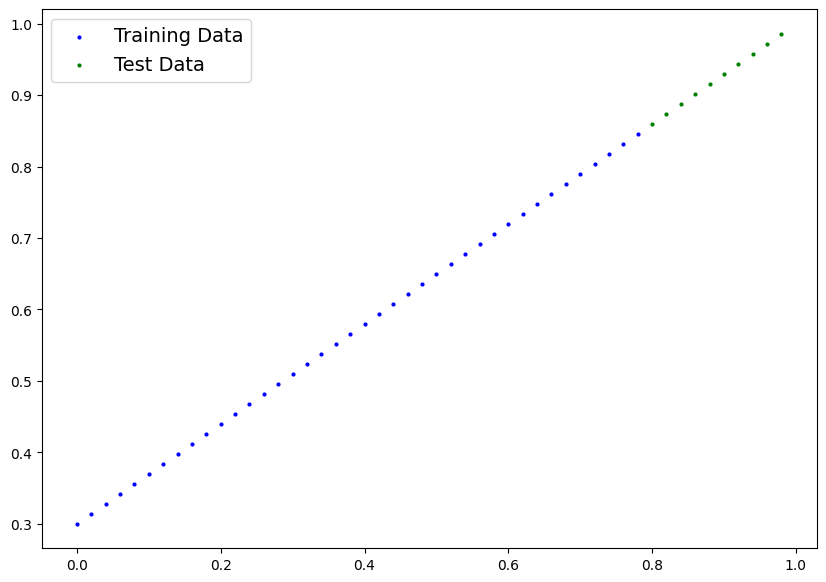

In [38]:
plot_predictions(X_train, y_train, X_test, y_test);

## 2. Bulid Model
Our first PyTorch model!
  
What does my model do?
* start with random values (weight and Bias
* Look at training data and adjust the random values to better
* look at training data and adjust the random values to better represent (or get closer to) the ideal vvalues (the weight and biasvalues we used to create the data )

How does it do so?(Algorithms)

1. Gradient decents
2. BackPropagation

In [39]:
#Create a linear regression model class
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):  #almost everything in pytorch is inheriate form nn
    def __init__(self):
        super().__init__()
        self.weight =nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))

        self.bias =nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))


        #FOrward ,ethod to define the computational in the model

    def forward(self,x:torch.tensor) ->torch.Tensor:  #x is input data here
            return self.weight * x + self.bias  #This is a linear regression formula




###Pytorch model building essentials

* torch.nn--contains all of the building for computational graphs (a neural network can be considered a computatona; graph)
* torch.nn.parameters--what parameter should our model try and learn,often a Pytorch layer from torch.nnwill set these for us
* torch.nn.Module--The base class for all neural network modules,if you subclass it,you should overwrite forward()
* torch.optim --This where the optimizer inpytorch live,they eill help eith gredient descend
* def forward()  --all nn.model subclass requires you to overwrite forward(),this method define what happens in the forward computation

### Checking the content of my pytorch model

We can check what is in our model by .peramater

In [40]:
#create a random seed
torch.manual_seed(42)
#create an instance of the model (this is a subclass of nn.module)
model_0 =LinearRegressionModel()

#Check out the paramenter
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [41]:
# List named parameter
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [42]:
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_model()
to check our model 's prediction power' , Lets see how well it predicts y_test based on X-test

When we pass data through our model ,It's going to run it through the forward() method

In [43]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [44]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [45]:
#make predictions with model

with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

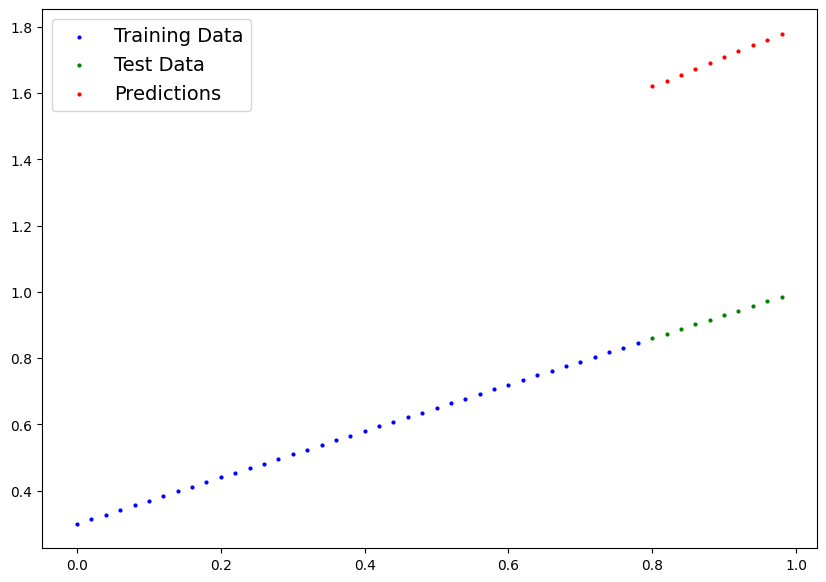

In [46]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)


## 3. Train model
  
   the whole idea of training model is to predict as much accurate as possible by moving the training datas

   One way to measure how poor your model prediction prediction are is to use a loss function

* Note :loss function may be called cost function or criteria in different areas.

* ** Loss function **:a function how wrong your mdoel's parameters are to the ideal outputs .lower is better
* ** Optimizer ** : Takes into account the loss of a model and adjust the model's parameters(eg.weight and bias)
    * inside the optimizer you often have to set two parameterss
    . params-the model paramater you'd like to optimize ,fro example params=model_0.parameters()

    . lr (learning rate) it show how big or how small the change is  

And specifically for pyTorch,We need:
* A training  loop
* A  testing loop



In [47]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [48]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [50]:
#setup the loss fFUnction
loss_fn=nn.L1Loss()

#setup an optimizer(stochastic gradient decend)

optimizer =torch.optim.SGD(model_0.parameters(),
                           lr=0.01
                           )   #lr=learning rate=possibly the most important hyperparameters you can set

* Q.whic loss function and optimizer shoild i use?

* A.This will be problrm specific .But with esperience You'll get an idea of what works and what doesnot work

For example for a regression problem (like ours) a loss function nn.L1Loss() and an optimixer like torch.optim.SGD() will suffice

classifying problem like a picture iis d og or a cat we'll use nn.BCELoss()

### Building a training loop in pyTorch

A couple of things we need in a training loop:
0. loop through the data
1. Forward pass(this invloves data moving through our model's `forward`() function ) to make prediction to the data also called forward propragation
2. calculate the loss(coampare forward pass prediction to ground truth lables)
3. optimizer zero grade
4. loss backward  -move backward through the network  to claculate the gradiennds of each of the parameters of our mdoell with respect to the loss ( ** backpropragation ** )
5. ptimizer step--use the optimizer to adjust our model's parameters to try and improve the loss ( ** graident decend ** )

In [163]:
torch.manual_seed(42)
#An ecoph is one loop through the data..
epochs=1

###Training

#0 .Loop through the data
for epoch in range (epochs):

  # ste the model to training mode
   model_0.train()  #train mode in pytorch set all parameters that requirs grideiants to grdiants

   #1.Forward pass
   y_preds=model_0(X_train)

   #2. calculate the loss
   #loss_fn = nn.MSELoss()


   loss=loss_fn(y_preds,y_train)
   print(f"Loss={loss}")

   #Optimixer xero grads

   optimizer.zero_grad()

   #4 perform backpropragation on the loss with respect to the parameters of the model

   loss.backward()

   #5stop the optimizer (perform gradientd descent)
   optimizer.step()

   model_0.eval() #turn off gridient tracking

   #print out model state _dict
   print(model_0.state_dict())




Loss=0.004425036255270243
OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])


In [164]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [26]:
weight,bias

(0.7, 0.3)

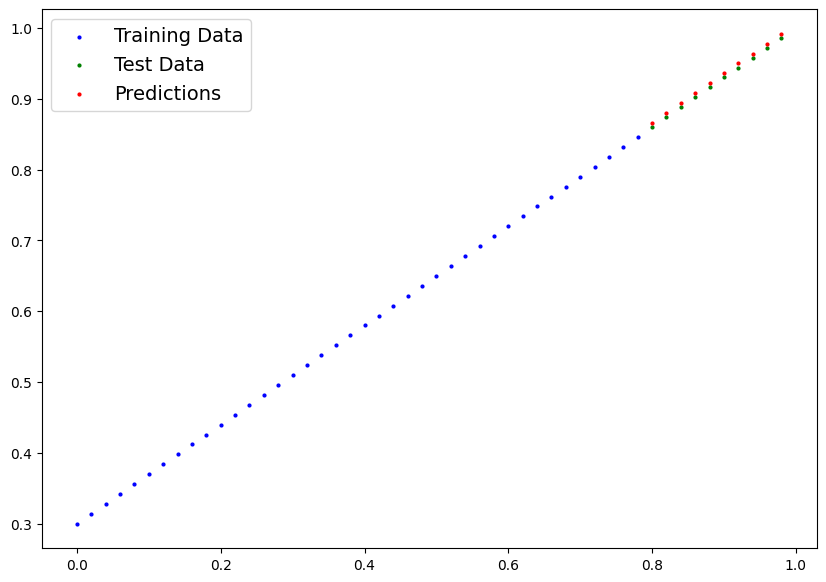

In [165]:
plot_predictions(predictions=y_preds_new)

In [147]:
y_preds

tensor([[0.2980],
        [0.3119],
        [0.3258],
        [0.3396],
        [0.3535],
        [0.3674],
        [0.3813],
        [0.3951],
        [0.4090],
        [0.4229],
        [0.4368],
        [0.4506],
        [0.4645],
        [0.4784],
        [0.4923],
        [0.5061],
        [0.5200],
        [0.5339],
        [0.5478],
        [0.5616],
        [0.5755],
        [0.5894],
        [0.6033],
        [0.6171],
        [0.6310],
        [0.6449],
        [0.6588],
        [0.6726],
        [0.6865],
        [0.7004],
        [0.7143],
        [0.7281],
        [0.7420],
        [0.7559],
        [0.7698],
        [0.7836],
        [0.7975],
        [0.8114],
        [0.8253],
        [0.8391]], grad_fn=<AddBackward0>)

In [148]:
y_preds_new

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])